In [ ]:
!pip install basemap

In [ ]:
 from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gp

from shapely.geometry import Point
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.basemap import Basemap

In [ ]:
file_path = '/content/drive/My Drive/Colab_Notebooks/Soil_moisture/data/'

In [ ]:
# Step 1: Read the CSV file
csv_file = "AvgInfo_Basins_Cluster_40NA_SMChangeClimate.csv"
df = pd.read_csv(file_path + 'csv/' + csv_file)


In [ ]:
# read the location shapefile
# gdf = gp.read_file(file_path + 'shape/'+ "peakSWE_precip.shp")
# gdf.crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(df['LonGauge'], df['LatGauge'])]
gdf = gp.GeoDataFrame(df, geometry=geometry)

# Step 3: Set the CRS for the GeoDataFrame
gdf.crs = "EPSG:4326"  # This is the standard CRS for geographic coordinates


In [ ]:
# Function to plot points
def draw_points(gdf, mpl_map, sizecol = None, color = 'red', alpha = 0.7, edgecolor = None, fill = True, cmap = None):
    '''
    Turns a geopandas gdf of points into matplotlib lat/lon objects for friendly plotting with basemap.
    '''
    lats = []
    lons = []
    for index, row in gdf.iterrows():
         for pt in list(row['geometry'].coords):
            lats.append(pt[1])
            lons.append(pt[0])

    if sizecol is None:
        sizecol = 0.006
    else:
        sizecol = sizecol.values

    m.scatter(lons, lats, latlon=True, s = sizecol, alpha=alpha, c = color, edgecolor = edgecolor, cmap = cmap)

<ipython-input-9-b4ef2495fb87>:27: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m.drawmapscale(-111.5, 36.,lon0=gdf.centroid.x[0], lat0=gdf.centroid.y[0], length = 300, fontsize = 14, linewidth = 2)


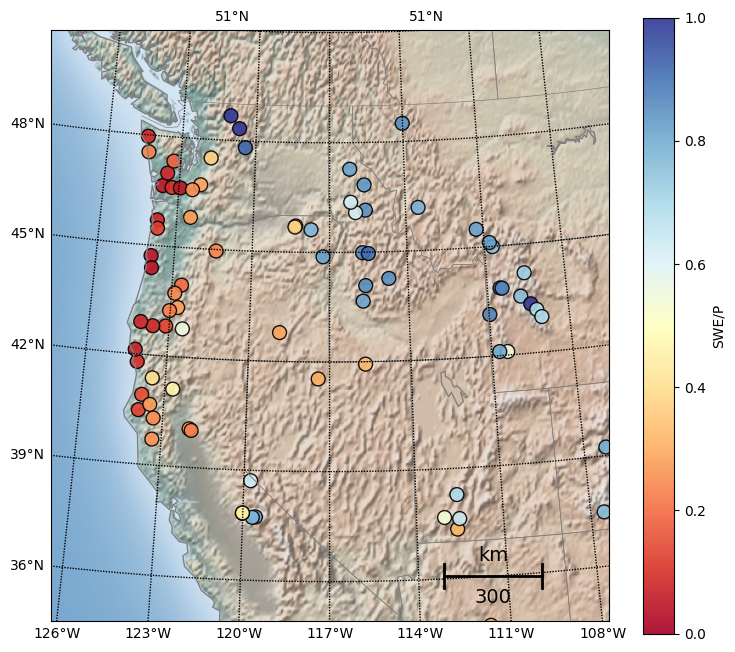

In [ ]:
# 1. Draw the map background
fig = plt.figure(figsize=(9, 8))

m = Basemap(projection='lcc', resolution='l',
            lat_0=43.0, lon_0=-117,
            width=1.7E6, height=1.8E6)


draw_points(gdf,m, alpha = .9, sizecol= (gdf["PeakSWE_PrecipRatio"]/gdf["PeakSWE_PrecipRatio"])*100,  color= gdf["PeakSWE_PrecipRatio"], edgecolor = 'black', cmap = 'RdYlBu')

# Add elements to basemap
m.shadedrelief(zorder = 0)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
# m.drawrivers(color = "blue")
# m.fillcontinents(color='none',lake_color='blue')

# Draw lines of latitude and longitude. Labels are like [left,right,top,bottom]
parallels = np.arange(0.,90.,3.)
meridians = np.arange(0.,360.,3.)

m.drawparallels(parallels,labels=[True,False,True,False]) # [left,right,top,bottom]
m.drawmeridians(meridians,labels=[True,False,False,True]) # [left,right,top,bottom]

# Scalebar
m.drawmapscale(-111.5, 36.,lon0=gdf.centroid.x[0], lat0=gdf.centroid.y[0], length = 300, fontsize = 14, linewidth = 2)


plt.colorbar(label='SWE/P')
plt.clim(0, 1)

plt.show()

<ipython-input-10-94de56c7f2b9>:40: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m.drawmapscale(-106., 34.5,lon0=gdf.centroid.x[0], lat0=gdf.centroid.y[0], length = 300, fontsize = 14, linewidth = 2)


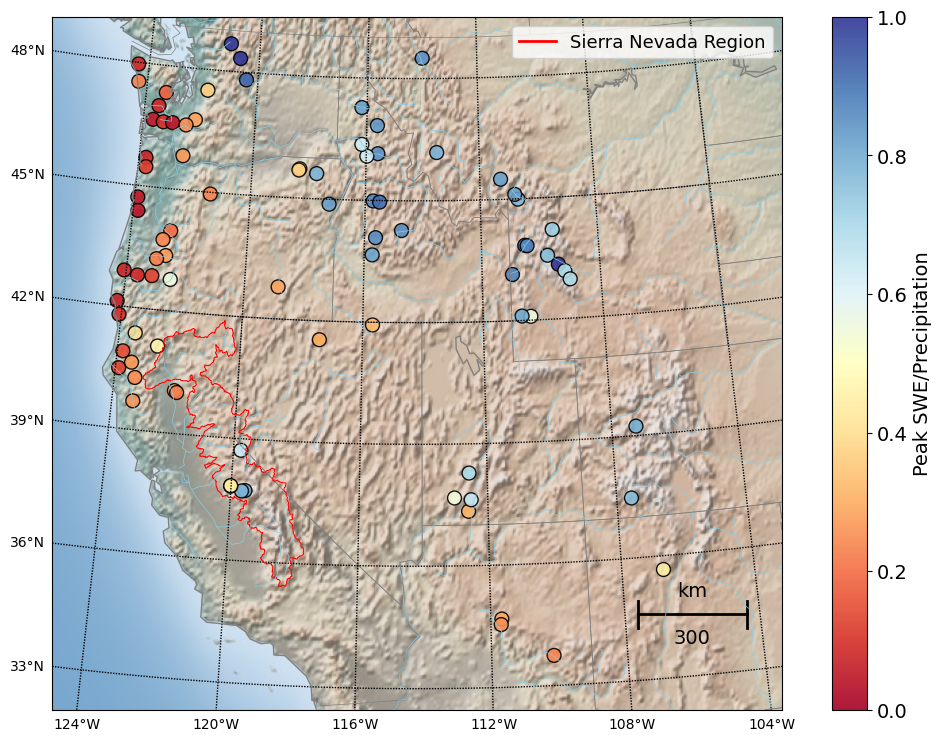

In [ ]:
# read the location shapefile
geometry = [Point(xy) for xy in zip(df['LonGauge'], df['LatGauge'])]
gdf = gp.GeoDataFrame(df, geometry=geometry)

# Step 3: Set the CRS for the GeoDataFrame
gdf.crs = "EPSG:4326"  # This is the standard CRS for geographic coordinates

# 1. Draw the map background
fig = plt.figure(figsize=(13, 9))

m = Basemap(projection='lcc', resolution='l', #lcc
            lat_0=41.0, lon_0=-114.2,
            width=2.0E6, height=1.9E6)

# Plot points
draw_points(gdf,m, alpha = .9, sizecol= (gdf["PeakSWE_PrecipRatio"]/gdf["PeakSWE_PrecipRatio"])*100,  color= gdf["PeakSWE_PrecipRatio"], edgecolor = 'black', cmap = 'RdYlBu')

# Add elements to basemap
m.shadedrelief(zorder = 0)
# m.bluemarble()
m.drawcountries(color='gray')
m.drawstates(color='gray')

# m.fillcontinents(color='none',lake_color='blue')

# Draw lines of latitude and longitude. Labels are like [left,right,top,bottom]
parallels = np.arange(0.,90.,3.)
meridians = np.arange(0.,360.,4.)

m.drawparallels(parallels,labels=[True,False,True,False]) # [left,right,top,bottom]
m.drawmeridians(meridians,labels=[True,False,False,True]) # [left,right,top,bottom]


# Plot region boundary
m.readshapefile((file_path + "shape/Sierra_reg_d"),'Sierra Nevada Region', drawbounds=True, linewidth=.7, color='r')
# m.readshapefile((idir_shp + "shape/UCol_reg"),'Upper Colorado Region', drawbounds=True, linewidth=.7, color='b')


# Scalebar
m.drawmapscale(-106., 34.5,lon0=gdf.centroid.x[0], lat0=gdf.centroid.y[0], length = 300, fontsize = 14, linewidth = 2)

#====================================================
# Legend
#====================================================
# Make the first legend (upper right of map)
custom_lines = [Line2D([0], [0], color='red', lw=2),
                Line2D([0], [0], color='blue', lw=2)
               ]

# plt.legend(custom_lines, ["Sierra Nevada Region", 'Upper Colorado Region'],
#                     loc = "upper right",
#                     prop={'size':13})
plt.legend(custom_lines, ["Sierra Nevada Region"],
                    loc = "upper right",
                    prop={'size':13})

m.drawrivers(color = "skyblue")
m.drawcoastlines(color='gray')

# Color bar
cbar = plt.colorbar(label='SWE/P')
plt.clim(0, 1)
cbar.set_label(r"Peak SWE/Precipitation", size=14)
# Color bar font size
cbar.ax.tick_params(labelsize=14)

plt.show()

In [ ]:
gdf.shape

(85, 117)